In [1]:
import pandas as pd

#Load the dataset
df = pd.read_csv('dielectron.csv')

In [2]:
# Display the first few rows
print(df.head())

      Run      Event        E1      px1         py1       pz1       pt1  \
0  147115  366639895  58.71410  -7.31132  10.531000 -57.29740  12.82020   
1  147115  366704169   6.61188  -4.15213  -0.579855  -5.11278   4.19242   
2  147115  367112316  25.54190 -11.48090   2.041680  22.72460  11.66100   
3  147115  366952149  65.39590   7.51214  11.887100  63.86620  14.06190   
4  147115  366523212  61.45040   2.95284 -14.622700 -59.61210  14.91790   

      eta1     phi1  Q1       E2        px2      py2      pz2       pt2  \
0 -2.20267  2.17766   1  11.2836  -1.032340 -1.88066 -11.0778   2.14537   
1 -1.02842 -3.00284  -1  17.1492 -11.713500  5.04474  11.4647  12.75360   
2  1.42048  2.96560   1  15.8203  -1.472800  2.25895 -15.5888   2.69667   
3  2.21838  1.00721   1  25.1273   4.087860  2.59641  24.6563   4.84272   
4 -2.09375 -1.37154  -1  13.8871  -0.277757 -2.42560 -13.6708   2.44145   

       eta2      phi2  Q2         M  
0 -2.344030 -2.072810  -1   8.94841  
1  0.808077  2.734920 

In [3]:
# Display data types
print(df.dtypes)

Run        int64
Event      int64
E1       float64
px1      float64
py1      float64
pz1      float64
pt1      float64
eta1     float64
phi1     float64
Q1         int64
E2       float64
px2      float64
py2      float64
pz2      float64
pt2      float64
eta2     float64
phi2     float64
Q2         int64
M        float64
dtype: object


In [4]:
# Summary statistics
print(df.describe())

                 Run         Event             E1           px1   \
count  100000.000000  1.000000e+05  100000.000000  100000.000000   
mean   147935.327230  4.957212e+08      36.436466       0.135897   
std       920.306064  4.037703e+08      41.216203      13.404976   
min    146511.000000  6.414000e+03       0.377928    -250.587000   
25%    147114.000000  2.023970e+08       8.458595      -5.233675   
50%    147929.000000  3.902759e+08      21.717000       0.141339   
75%    149011.000000  6.338891e+08      50.003350       5.714560   
max    149182.000000  1.791247e+09     850.602000     134.539000   

                 py1            pz1            pt1           eta1  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.182291      -1.508037      14.412167      -0.064095   
std        13.470281      51.603652      12.388740       1.462137   
min      -126.079000    -840.987000       0.219629      -4.165380   
25%        -5.276248     -15.859825       

In [5]:
# Check for missing values
print(df.isnull().sum())

Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64


In [6]:
# Example: drop rows with missing values
df = df.dropna()

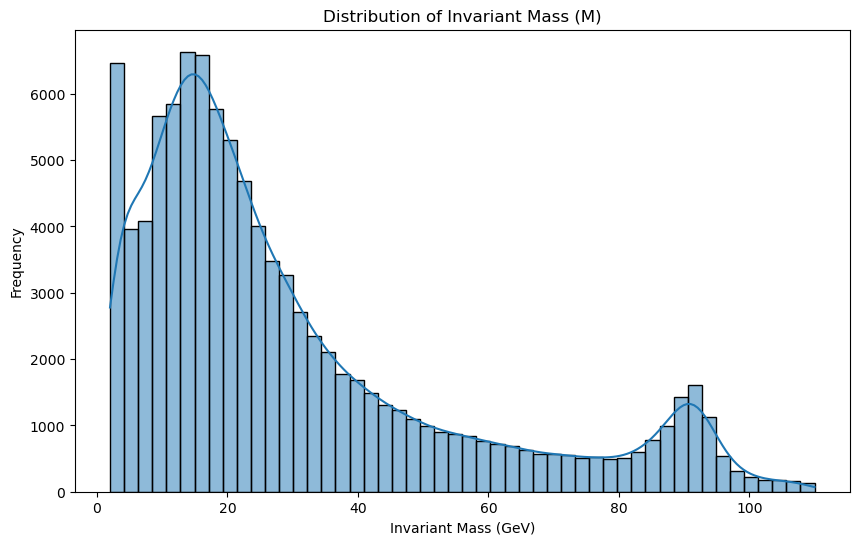

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of invariant mass
plt.figure(figsize=(10,6))
sns.histplot(df['M'], bins=50, kde=True)
plt.title('Distribution of Invariant Mass (M)')
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Frequency')
plt.show()

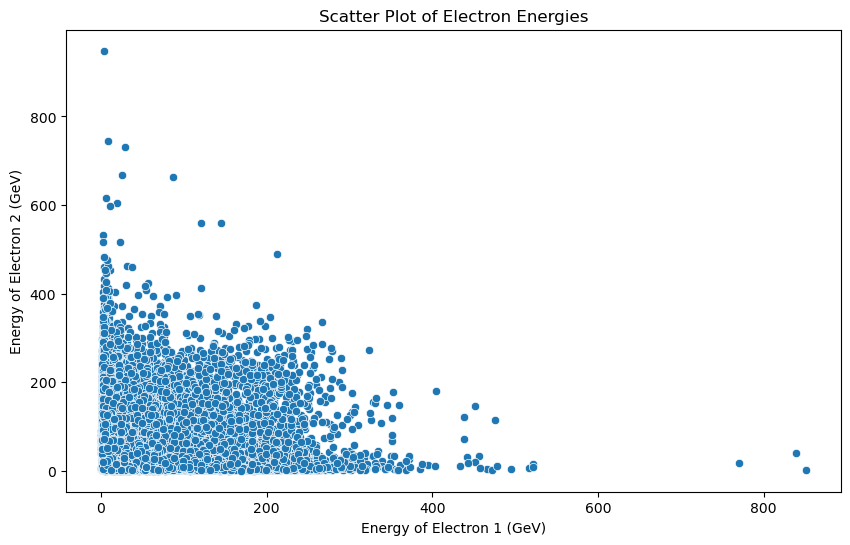

In [8]:
# Scatter plot of the energies of two electrons
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['E1'], y=df['E2'])
plt.title('Scatter Plot of Electron Energies')
plt.xlabel('Energy of Electron 1 (GeV)')
plt.ylabel('Energy of Electron 2 (GeV)')
plt.show()

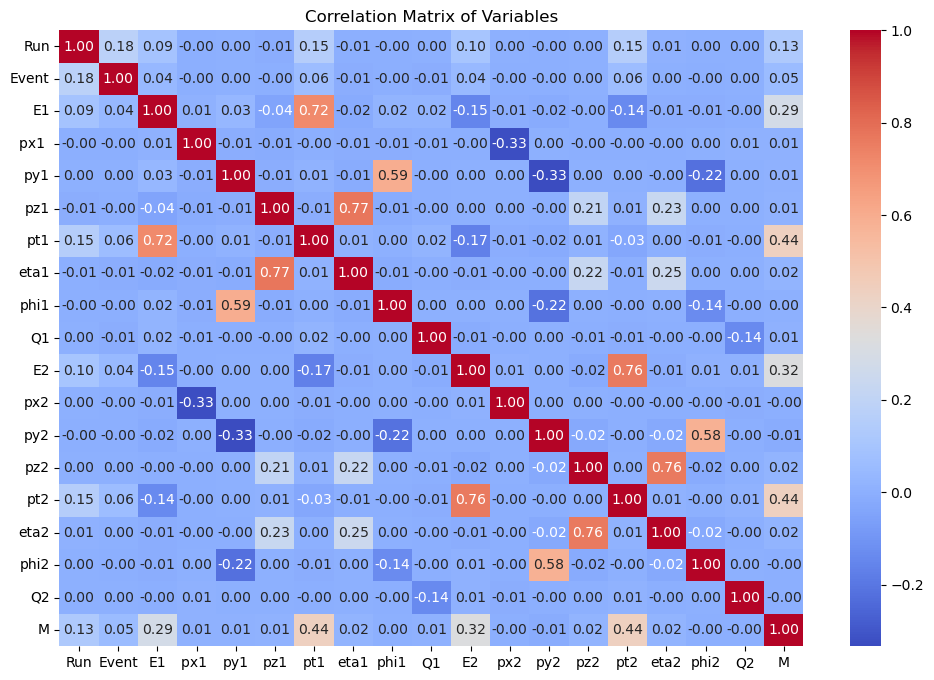

In [9]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Variables')
plt.show()

In [10]:
# Export to CSV
df.to_csv('cleaned_dielectron_data.csv', index=False)

In [12]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

#Rename the 'px1 ' column to fix the error
df = df.rename(columns={'px1 ': 'px1'})

# Feature Selection 
# Independent variables (features) energies and momenta
X = df[['E1', 'E2', 'px1', 'py1', 'pz1', 'px2', 'py2', 'pz2']] 

# Dependent variable (target) invariant mass
y = df['M']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', metrics.r2_score(y_test, y_pred))

# Examine the model coefficients to see which features are most important
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Absolute Error: 17.04319955796205
Mean Squared Error: 500.5516043130074
Root Mean Squared Error: 22.37301062246669
R-squared: 0.217704969622876
     Coefficient
E1      0.212772
E2      0.204386
px1     0.013118
py1    -0.006536
pz1     0.011475
px2    -0.005439
py2    -0.005513
pz2     0.009006
